In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EDA files/Balaji Fast Food Sales.csv")

# **Business Objective**

To analyze sales performance across day, month, and year to identify revenue trends, top-selling and least-selling products (by both revenue and quantity), peak sales times, gender-wise purchase patterns, transaction-type behavior, and performance of different item types. This analysis will help improve inventory planning, optimize staffing based on peak hours, enhance targeted marketing, and increase overall business profitability.

# **Data Cleaning**

In [ ]:
##Handling Missing Value

df.isnull().sum()

,0
order_id,0
date,0
item_name,0
item_type,0
item_price,0
quantity,0
transaction_amount,0
transaction_type,0
received_by,0
time_of_sale,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
##Handling Duplicate value

df.duplicated().sum()

np.int64(0)

In [ ]:
##Incorrect Datatype

df['date']=pd.to_datetime(df['date'], format='mixed', dayfirst=True)

# **Data understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 893 entries, 1 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            893 non-null    int64         
 1   date                893 non-null    datetime64[ns]
 2   item_name           893 non-null    object        
 3   item_type           893 non-null    object        
 4   item_price          893 non-null    int64         
 5   quantity            893 non-null    int64         
 6   transaction_amount  893 non-null    int64         
 7   transaction_type    893 non-null    object        
 8   received_by         893 non-null    object        
 9   time_of_sale        893 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
df.head(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-03-02,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-02-10,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
5,6,2022-11-14,Vadapav,Fastfood,20,10,200,Cash,Mr.,Evening
6,7,2022-03-05,Sugarcane juice,Beverages,25,9,225,Cash,Mr.,Evening
7,8,2022-12-22,Panipuri,Fastfood,20,14,280,Online,Mr.,Night
8,9,2022-10-06,Panipuri,Fastfood,20,1,20,Cash,Mrs.,Morning
9,10,2022-09-16,Panipuri,Fastfood,20,5,100,Online,Mr.,Afternoon
10,11,2022-01-12,Frankie,Fastfood,50,8,400,Online,Mrs.,Afternoon


In [ ]:
df.tail(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
985,986,2022-04-30,Sugarcane juice,Beverages,25,13,325,Online,Mr.,Night
986,987,2023-04-01,Vadapav,Fastfood,20,3,60,Cash,Mrs.,Evening
988,989,2022-11-10,Cold coffee,Beverages,40,13,520,Cash,Mr.,Afternoon
989,990,2022-11-24,Vadapav,Fastfood,20,10,200,Online,Mrs.,Morning
990,991,2023-01-18,Sandwich,Fastfood,60,7,420,Cash,Mrs.,Night
991,992,2022-10-21,Sandwich,Fastfood,60,5,300,Cash,Mr.,Morning
992,993,2022-07-17,Frankie,Fastfood,50,3,150,Online,Mrs.,Night
993,994,2022-01-11,Panipuri,Fastfood,20,2,40,Online,Mrs.,Evening
994,995,2022-06-18,Sugarcane juice,Beverages,25,1,25,Online,Mr.,Night
999,1000,2022-05-29,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [ ]:
df.shape

(893, 10)

# **Feature Engineering**

In [ ]:
df["day"]=df["date"].dt.day
df["month"]=df["date"].dt.month
df["year"]=df["date"].dt.year
df["day_name"]=df["date"].dt.day_name()

# **Checking Outlier by Box plot**

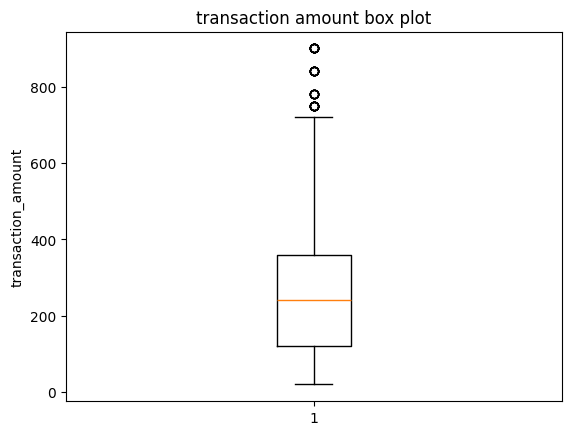

In [ ]:
plt.boxplot(df["transaction_amount"])
plt.ylabel("transaction_amount")
plt.title("transaction amount box plot")
plt.show()

# **Top selling Item name & Item type**

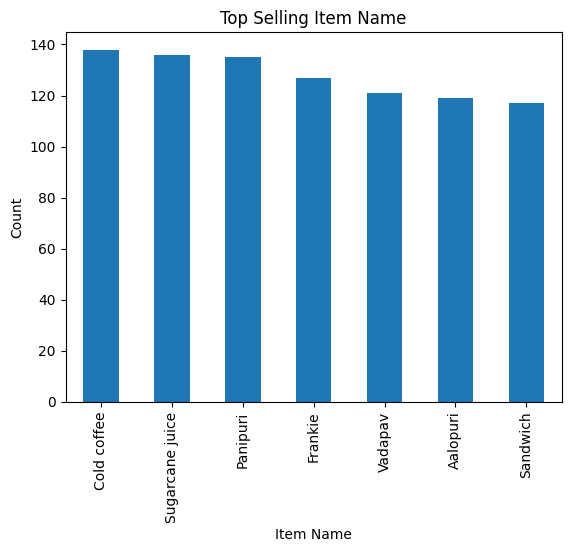

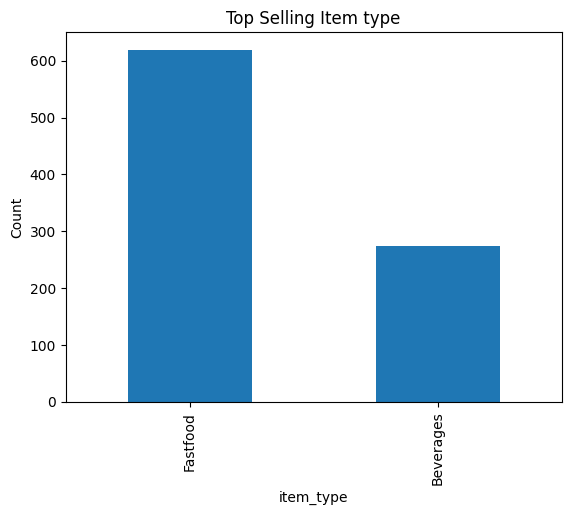

In [ ]:
##Top Selling Item name

df['item_name'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Top Selling Item Name')
plt.show()

##Top Selling Item type

df['item_type'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.xlabel('item_type')
plt.ylabel('Count')
plt.title('Top Selling Item type')
plt.show()

# **Gender-based Analysis**

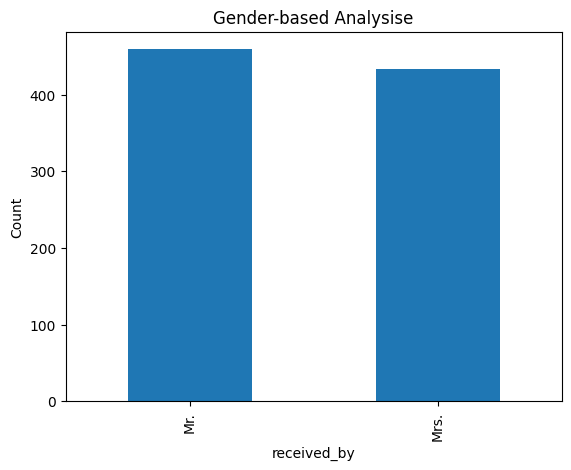

In [ ]:
df['received_by'].value_counts().plot(kind='bar')
plt.xlabel('received_by')
plt.ylabel('Count')
plt.title('Gender-based Analysise')
plt.show()

# **Top and Least Selling Product by Revenue**

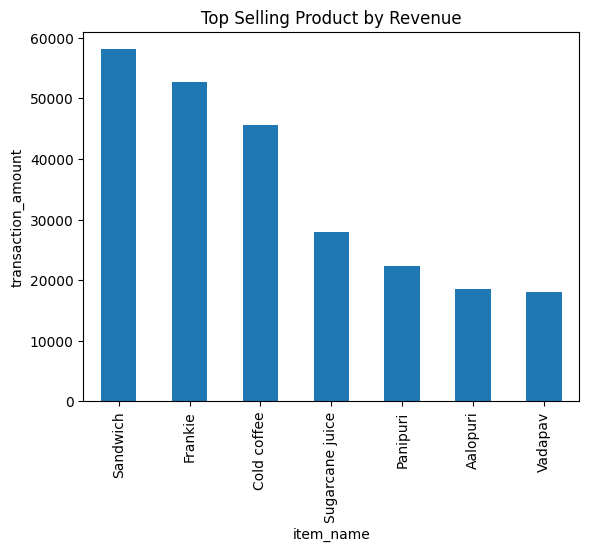

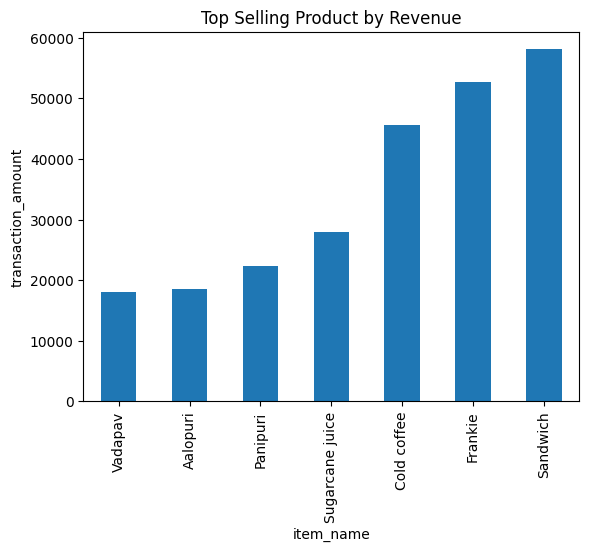

In [ ]:
##Top Selling Product by Revenue

top_selling_product_by_revenue = df.groupby("item_name")['transaction_amount'].sum().sort_values(ascending=False).head(10)
top_selling_product_by_revenue.plot(kind="bar")
plt.xlabel('item_name')
plt.ylabel('transaction_amount')
plt.title('Top Selling Product by Revenue')
plt.show()

##Least Selling Product by Revenue

least_selling_product_by_revenue = df.groupby("item_name")['transaction_amount'].sum().sort_values().head(10)
least_selling_product_by_revenue.plot(kind="bar")
plt.xlabel('item_name')
plt.ylabel('transaction_amount')
plt.title('Top Selling Product by Revenue')
plt.show()

# **Top and Least Selling Product by Quantity**

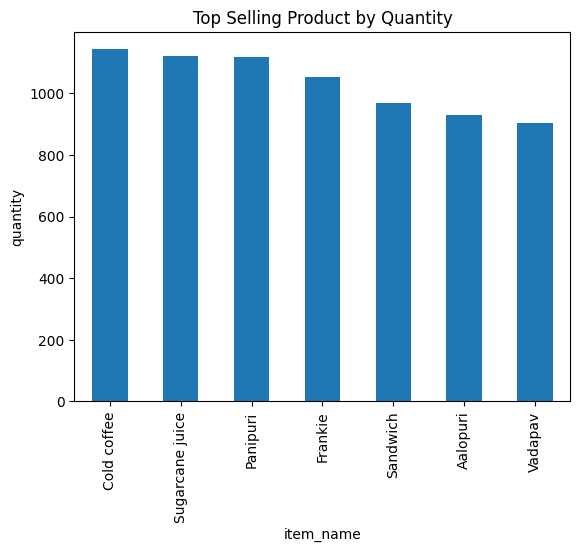

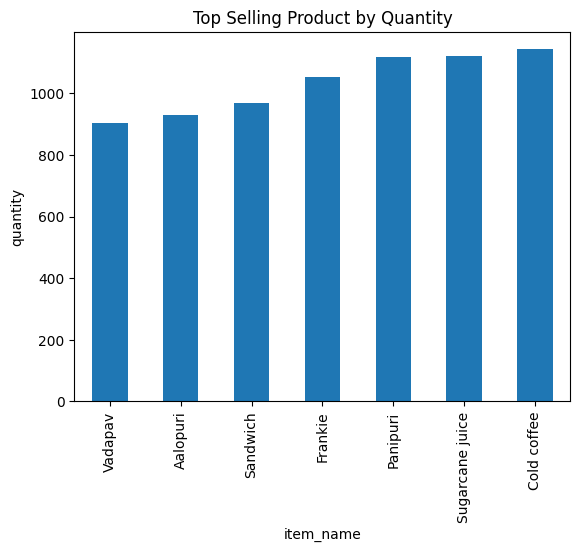

In [ ]:
##Top Selling Product by Quantity

top_selling_product_by_quantity = df.groupby("item_name")['quantity'].sum().sort_values(ascending=False).head(10)
top_selling_product_by_quantity.plot(kind="bar")
plt.xlabel('item_name')
plt.ylabel('quantity')
plt.title('Top Selling Product by Quantity')
plt.show()

##Least Selling Product by Quantity

least_selling_product_by_quantity = df.groupby("item_name")['quantity'].sum().sort_values().head(10)
least_selling_product_by_quantity.plot(kind="bar")
plt.xlabel('item_name')
plt.ylabel('quantity')
plt.title('Top Selling Product by Quantity')
plt.show()

# **Tranction type Analysis**

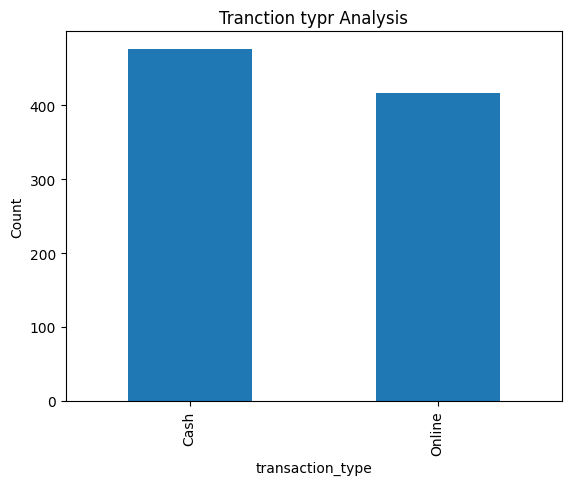

In [ ]:
df['transaction_type'].value_counts().plot(kind='bar')
plt.xlabel('transaction_type')
plt.ylabel('Count')
plt.title('Tranction type Analysis')
plt.show()


# **Sales Peak Time Analysis**

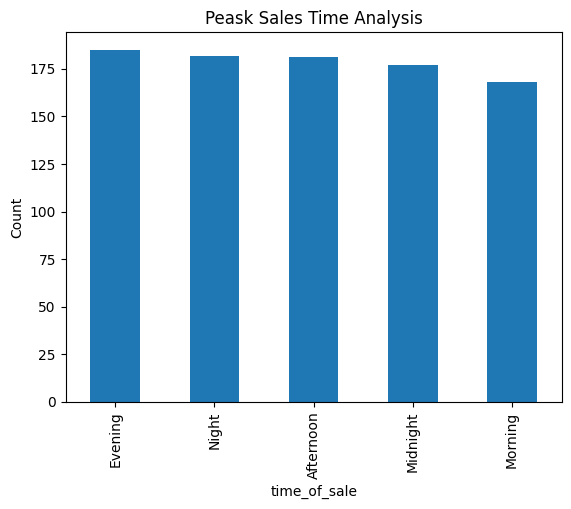

In [ ]:
df['time_of_sale'].value_counts().plot(kind='bar')
plt.xlabel('time_of_sale')
plt.ylabel('Count')
plt.title('Peask Sales Time Analysis')
plt.show()

# **Day, Month , Year and Weekday sales analysis**

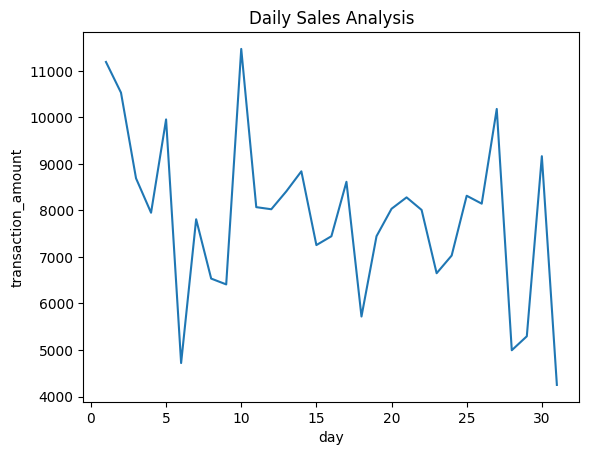

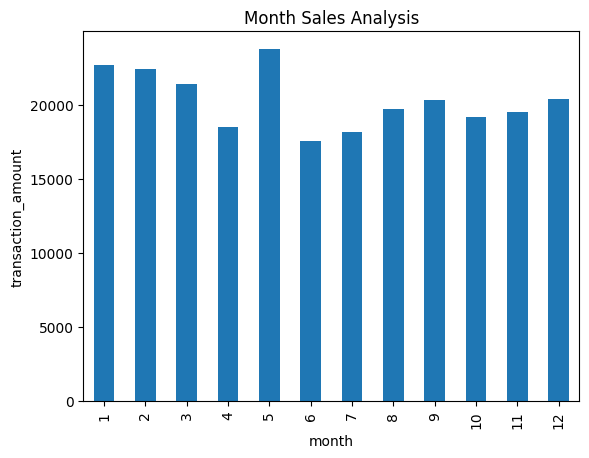

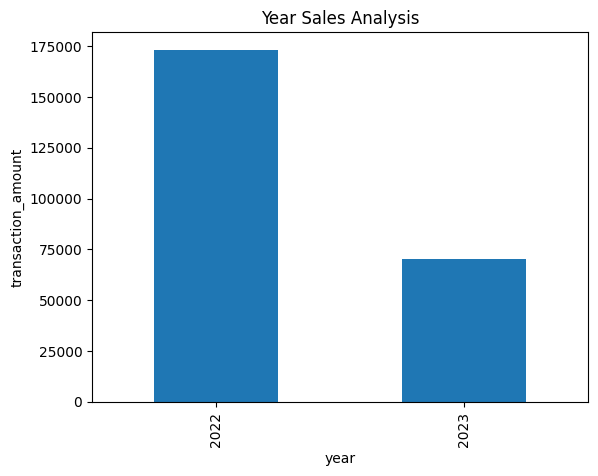

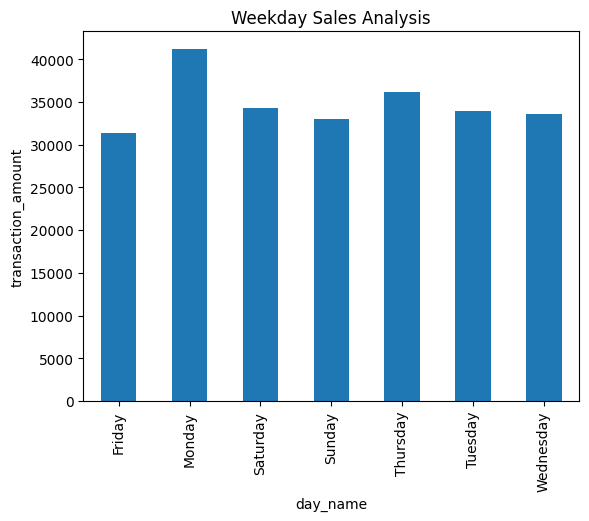

In [ ]:
## Day - Wise Sales Analysis


daily_sales = df.groupby('day')["transaction_amount"].sum()
daily_sales.plot(kind='line')
plt.xlabel('day')
plt.ylabel('transaction_amount')
plt.title('Daily Sales Analysis')
plt.show()

## Month - Wise Sales Analysis

monthly_sales = df.groupby('month')["transaction_amount"].sum()
monthly_sales.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('transaction_amount')
plt.title('Month Sales Analysis')
plt.show()

## Year - Wise Sales Analysis

yearly_sales = df.groupby('year')["transaction_amount"].sum()
yearly_sales.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('transaction_amount')
plt.title('Year Sales Analysis')
plt.show()

##Weekday - Wise Sales Analysis

weekday_sales = df.groupby('day_name')["transaction_amount"].sum()
weekday_sales.plot(kind='bar')
plt.xlabel('day_name')
plt.ylabel('transaction_amount')
plt.title('Weekday Sales Analysis')
plt.show()